# Let's do some quick python!

In [1]:
print('hello world')

hello world


Task: print your name

In [3]:
for i in range(5):
    print(i)

0
1
2
3
4


In [5]:
for i in range(5):
    if i>2:
        print('bigger than 3')

bigger than 3
bigger than 3


Task: add up all odd numbers up to 20. hint: % is the reminder operation

In [10]:
foo = (1,2,3,4,5)
bar = []
for i in foo:
    bar.append(i)
    
print(bar)

[1, 2, 3, 4, 5]


But really, usually we should be using numpy

In [12]:
import numpy as np

In [15]:
foo = np.array(foo)

In [16]:
bar+1

TypeError: can only concatenate list (not "int") to list

In [17]:
foo+1

array([2, 3, 4, 5, 6])

In [18]:
foo[2:]

array([3, 4, 5])

In [20]:
foo[:-1]

array([1, 2, 3, 4])

In [22]:
foo[::2]

array([1, 3, 5])

In [25]:
foo[::-1]

array([5, 4, 3, 2, 1])

In [26]:
np.sum(foo)

15

In [29]:
np.average(foo)

3.0

In [32]:
data = np.random.normal(0,123,10000)

You can do a bunch of stuff just with numpy functions and numpy arrays without forloops. It is SO much faster than forloops.

Task: google how to take the standard deviation of data

Now let's make some plots

In [45]:
import matplotlib.pyplot as plt

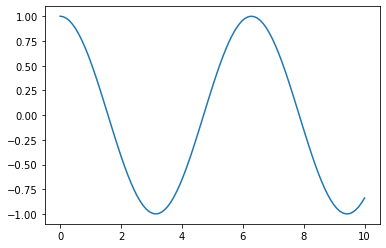

In [46]:
x = np.linspace(0,10,100)

plt.plot(x, np.cos(x))
plt.show()

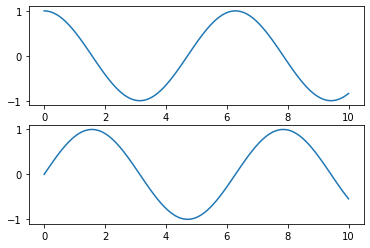

In [47]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x, np.cos(x))
ax[1].plot(x, np.sin(x))
plt.show()

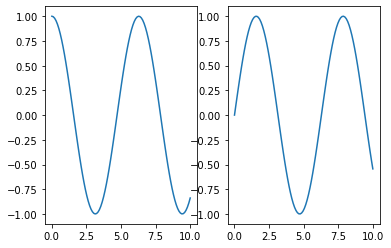

In [50]:
fig, ax = plt.subplots(1,2)
ax[0].plot(x, np.cos(x))
ax[1].plot(x, np.sin(x))
plt.savefig("test_sinwave.pdf")
plt.show()

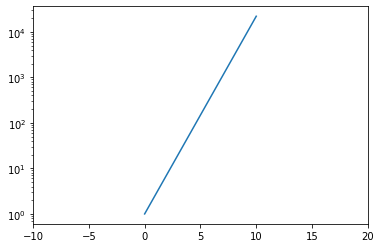

In [52]:
plt.plot(x, np.exp(x))
plt.yscale('log')
plt.xlim((-10,20))
plt.show()

Task: Make 2 subplots. One with $x^5$ with x and y scales both logscales and y limits from 0 to 10000. Second with $\log(x)$ and figure out how to make the line look straight.

Now some scipy. There are SO many features, but we're going to just showcase some linear algebra and interpolation

In [68]:
import scipy
from scipy import linalg

In [72]:
mat = np.array(((3,2,15),(3,45,20),(19,23,5)))
inv = scipy.linalg.inv(mat)
print(inv)

[[ 0.0199745  -0.02847429  0.05397365]
 [-0.03102422  0.02294943  0.00127497]
 [ 0.06680833  0.00263493 -0.01096473]]


In [71]:
print(np.linalg.inv(mat))

[[ 0.0199745  -0.02847429  0.05397365]
 [-0.03102422  0.02294943  0.00127497]
 [ 0.06680833  0.00263493 -0.01096473]]


In [74]:
mat@inv

array([[ 1.00000000e+00, -9.54097912e-18,  4.68375339e-17],
       [ 3.88578059e-16,  1.00000000e+00,  6.93889390e-18],
       [ 9.71445147e-17, -3.55618313e-17,  1.00000000e+00]])

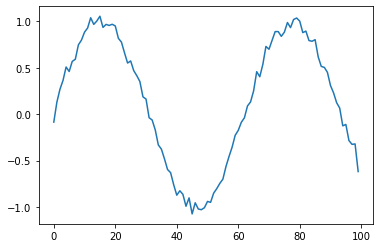

In [118]:
data = np.sin(x) + np.random.normal(0,0.05, len(x))
plt.plot(data)
plt.show()

In [132]:
from scipy.interpolate import UnivariateSpline as interp

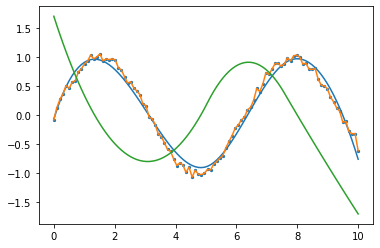

In [138]:
intp1 = interp(x, data, s = 1)
deriv1 = intp1.derivative(1)

intp2 = interp(x, data, s = 0)

plt.scatter(x, data, s = 5)
plt.plot(x, intp1(x))
plt.plot(x, intp2(x))
plt.plot(x, deriv1(x))

plt.show()

Task: Play around with "smoothing"

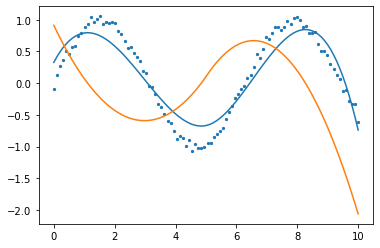

In [140]:
smoothing = 5
intp1 = interp(x, data, s = smoothing)
deriv1 = intp1.derivative(1)

plt.scatter(x, data, s = 5)
plt.plot(x, intp1(x))
plt.plot(x, deriv1(x))

plt.show()

Task: create a fake dataset of $x^2$, interpolate, and take the derivative. Compare that with a fake dataset of $2x$ by plotting both

There is so much more, like astropy for a bunch of astrophysics stuff and sklearn for a bunch of machine learning stuff. Go wild!